In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from scipy.signal import find_peaks



In [4]:
folder_path = "XRD_csv"

In [5]:
file_names = os.listdir(folder_path)

In [6]:
dfs = [pd.read_csv(os.path.join(folder_path, file_name)) for file_name in file_names]
data = pd.concat(dfs, ignore_index=True)

In [9]:
Angles = data["Angle"].values.reshape(-1, 1)
Intensity = data["Intensity"].values

In [10]:
peak_indices, _ = find_peaks(Intensity, distance=10)

In [11]:
peak_labels = ["Peak" if i in peak_indices else "No Peak" for i in range(len(Intensity))]

In [12]:
features = pd.DataFrame({"angle": Angles.flatten(), "intensity": Intensity, "peak_label": peak_labels})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features[["angle", "intensity"]], features["peak_label"], test_size=0.2, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = classifier.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     No Peak       0.94      0.93      0.93     13759
        Peak       0.15      0.16      0.15      1035

    accuracy                           0.88     14794
   macro avg       0.54      0.55      0.54     14794
weighted avg       0.88      0.88      0.88     14794



In [17]:
new_file_name = "OPCM-14D 2.csv"

In [18]:
new_data = pd.read_csv(os.path.join(folder_path, new_file_name))

In [19]:
new_angles = new_data["Angle"].values.reshape(-1, 1)
new_intensity = new_data["Intensity"].values

In [20]:
new_peak_indices, _ = find_peaks(new_intensity, distance=10)

In [21]:
new_peak_labels = ["Peak" if i in new_peak_indices else "No Peak" for i in range(len(new_intensity))]

In [22]:
new_features = pd.DataFrame({"angle": new_angles.flatten(), "intensity": new_intensity, "peak_label": new_peak_labels})

In [23]:
new_features_scaled = scaler.transform(new_features[["angle", "intensity"]])

In [24]:
new_peak_predictions = classifier.predict(new_features_scaled)
print("Peak Labels for New Data:")
print(new_peak_predictions)

Peak Labels for New Data:
['No Peak' 'No Peak' 'No Peak' ... 'No Peak' 'No Peak' 'No Peak']


In [25]:
import matplotlib.pyplot as plt

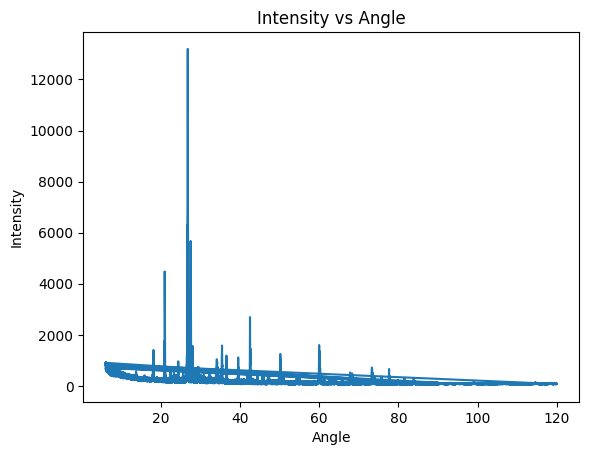

In [26]:
plt.plot(Angles, Intensity)
plt.xlabel("Angle")
plt.ylabel("Intensity")
plt.title("Intensity vs Angle")
plt.show()

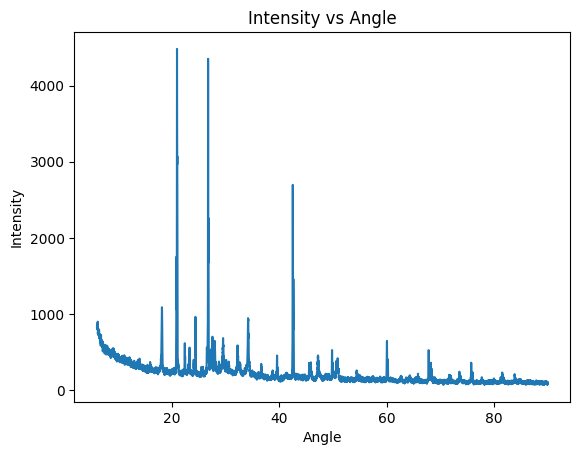

In [27]:
plt.plot(new_angles, new_intensity)
plt.xlabel("Angle")
plt.ylabel("Intensity")
plt.title("Intensity vs Angle")
plt.show()